# Dynamical Power Systems Tutorial 
## Part A: Single machine infinite bus 

### The model
The *single-machine-infinite-bus* model mimics the dynamics of a single oscillator connected to an infinitely large grid lumped together. The differential equation (for states $(\varphi, \omega)\in [0, 2\pi) \times \mathbb{R}$ in the co-rotating reference frame) reads
$$\begin{align*}
\frac{\mathrm{d}\varphi}{\mathrm{d}t} &= \omega \\
\frac{\mathrm{d}\omega}{\mathrm{d}t} &= P/M - \omega D/M - K/M \sin(\varphi)
\end{align*}$$
with locally produced/consumed power $P$, mass $M$, damping factor $D$, and coupling $K$. The cell below integrates the system from $t_0 = 0$ to $t = 20$. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from source.coupled_swing_systems import SmibSystem

# System parameters (intertia, damping, power injection, coupling)
M = 0.1; D = 0.05; P = 0.3; K = 1.0

# Stable Steady state phase angle (analytical solution)
u_eq = [np.arcsin(P / K), 0.]
print(f"Stable steady state phase angle: {u_eq[0]}")

Stable steady state phase angle: 0.3046926540153975



### Task 1:  Relaxation behaviour 
Study the transient and long-term behaviour of the system. For this, try out different initialisations $x_0 = (\varphi_0, \omega_0)\in [0, 2\pi) \times \mathbb{R}$. Does the system always relax to the steady state solution?

In [3]:

# Simulation parameters
t_span = (0.0, 20.0) # time span for the simulation
t_eval = np.linspace(t_span[0], t_span[1], 3000)

# Model definition
model = SmibSystem(M, D, P, K) 

# Simulate stable trajectory
u_init = [u_eq[0]+2.5, 1.2] # initial conditions
solution = solve_ivp(model, t_span, u_init, t_eval=t_eval)

SMIB system initialized with M=0.1, D=0.05, P=0.3, K=1.0


After integrating the system, plot the result with the following cell. In the plots, the red dashed lines indicate the analytical steady state solution. 

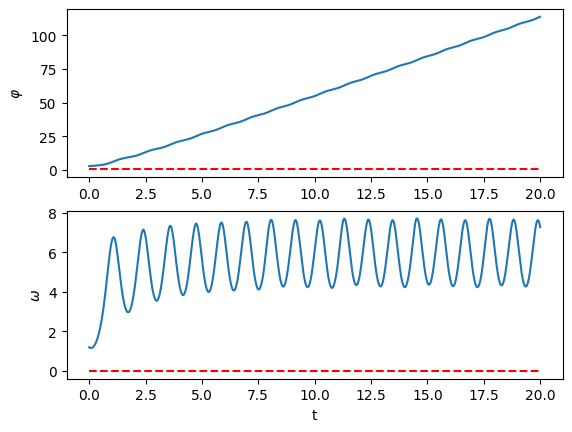

In [4]:
# Plotting t vs omega
fig, ax = plt.subplots(2, 1)
ax[0].plot(solution.t, solution.y[0])
ax[1].plot(solution.t, solution.y[1])
ax[0].hlines(u_eq[0], solution.t[0], solution.t[-1], 'r', '--')
ax[1].hlines(u_eq[1], solution.t[0], solution.t[-1], 'r', '--')
ax[0].set_ylabel(r'$\varphi$')
ax[1].set_ylabel(r'$\omega$')
ax[1].set_xlabel(r't')
plt.show()


Sometimes, analysing the trajectory in state space can be more helpful. 

### Task 2: State space trajectory 
Visualise the state space trajectory on top of the phase portrait. For this, we first calculate the gradient magnitudes throughout state space. 

In [5]:
from source.utils import create_2Dphaseportrait

# Plot the phase portrait
phi_lims = 1.0 * np.array([-1.0*np.pi, 1.0* np.pi]) + u_eq[0]; omega_lims = 20 * np.array([-1, 1]); res = 100
X, Y, U, V = create_2Dphaseportrait(model, phi_lims, omega_lims, 0.0, N=res, normalize=False)

vec_mag = np.sqrt(U**2 + V**2)
# Normalized gradients
U_dir = U / vec_mag; V_dir = V / vec_mag

Then, plot it...

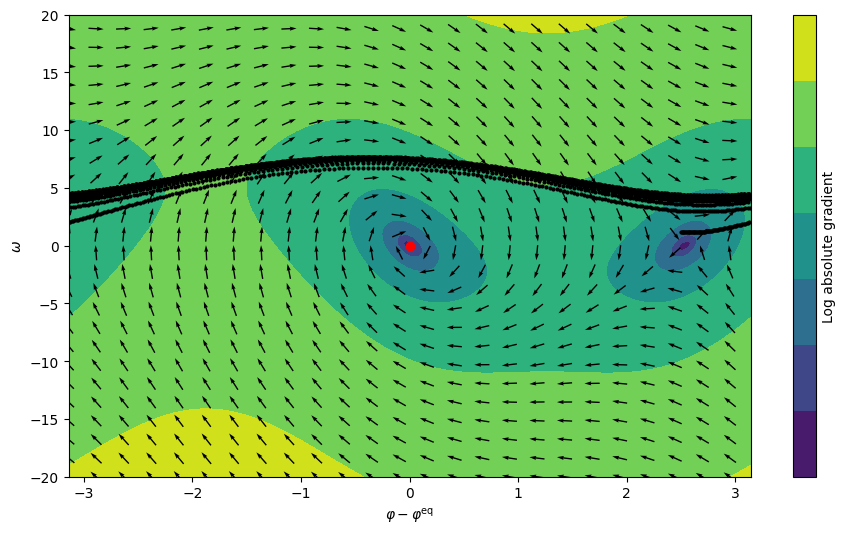

In [6]:
skip = 4 # skip every 2nd point in the quiver plot 
fig, ax = plt.subplots(figsize=(11, 6))
main_c = ax.contourf(X - u_eq[0], Y, np.log(vec_mag) )
ax.quiver(X[::skip, ::skip] - u_eq[0], Y[::skip, ::skip], U_dir[::skip, ::skip], V_dir[::skip, ::skip], scale=45, width=0.002, pivot="mid")

ax.set_xlabel(r'$\varphi - \varphi^\mathrm{eq}$')
ax.set_ylabel(r'$\omega$')
# Plot the trajectory and the equilibrium point
ax.plot((solution.y[0]- u_eq[0] + np.pi ) % (2*np.pi) - np.pi, solution.y[1], 'ko', markersize=2)
ax.plot(u_eq[0] - u_eq[0], u_eq[1], 'ro')

cbar = fig.colorbar(main_c, ticks=[])
cbar.set_label(label='Log absolute gradient')
plt.show()

### Task 3: Impact of damping $D$ on dynamics
For different values of $D$, we analyse the spectrum of the jacobian matrix with numpy (see [Eigenvalues and Eigenvectors in Python](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter15.04-Eigenvalues-and-Eigenvectors-in-Python.html)). The other parameters are fixed to $M = 0.1, D = 0.05, P = 0.3, K = 1.0$. It is convenient to visualise the impact of $D$ on the eigenvalues in the root locus diagram. Note that the jacobian function is already implemented as member function of ``SmibModel``. 

In [ ]:
from numpy.linalg import eig

# Set other parameters M, P, K
M = 0.1; P = 5; K = 100.0

Ds = np.linspace(0, 10, 100)

ls = np.zeros((len(Ds), 2), dtype=complex)
for (i, D) in enumerate(Ds): 
    system = SmibSystem(M, D, P, K, verbose=False)
    # u_eq = [np.arcsin(P / K), 0.]
    eigvals, _ = eig(system.jacobian(u_eq, 0.0))
    ls[i,:] = eigvals

plt.plot(np.real(ls[:, 0]), np.imag(ls[:, 0]), '1', color='red', label=r'$\lamba_1$') 
plt.plot(np.real(ls[:, 1]), np.imag(ls[:, 1]), '2', color='blue', label=r'$\lamba_2$')
plt.xlabel(r'Re $\lambda$')
plt.ylabel(r'Im $\lambda$')
plt.show()